# UN Data Analysis
### UN GDP Per Capita 

__###Q3. Import the required packages with their customary aliases as follows:__

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

__#Q4. Using the pandas `read_csv()` method, read the GDP dataset into your notebook as a DataFrame called `gdp_df`.
Take a look at the first few and last few rows to familiarize yourself with what is contained in this dataset.__

In [2]:
gdp_df=pd.read_csv('../data/gdp_percapita.csv')

__#Q5. How many rows and columns are in `gdp_df`? What are the data types of each column?__

In [3]:
#Number of columns and rows
gdp_df.shape

(8219, 4)

In [4]:
#showing data types
gdp_df.dtypes

Country or Area     object
Year                 int64
Value              float64
Value Footnotes    float64
dtype: object

__#Q6. Drop the `Value Footnotes` column and rename the remaining three to 'Country', 'Year', and 'GDP_Per_Capita'.__

In [5]:
#Dropping Value Footnotes
gdp_df.drop('Value Footnotes', axis=1, inplace=True)

In [6]:
#Rename the three columns to 'Country', 'Year', and 'GDP_Per_Capita'
gdp_df=gdp_df.rename(columns={'Country or Area': 'Country', 'Value': 'GDP_Per_Capita'})
gdp_df.head()

,Country,Year,GDP_Per_Capita
0,Afghanistan,2023,1992.424394
1,Afghanistan,2022,1981.710168
2,Afghanistan,2021,2144.166570
3,Afghanistan,2020,2769.685745
4,Afghanistan,2019,2927.245144


__#Q7. How many countries have data for all years? 
Which countries are missing many years of data? Look at the number of observations per year. 
What do you notice?__

In [7]:
#the range of years
range(gdp_df['Year'].min(), gdp_df['Year'].max())

range(1990, 2023)

In [8]:
gdp_df['Year'].nunique()

34

In [9]:
all_years = gdp_df['Year'].unique()

In [10]:
country_year_counts = gdp_df.groupby('Country')['Year'].nunique()

In [11]:
country_year_counts

Country
Afghanistan                    24
Africa Eastern and Southern    34
Africa Western and Central     34
Albania                        34
Algeria                        34
                               ..
Virgin Islands                 21
West Bank and Gaza             30
World                          34
Zambia                         34
Zimbabwe                       34
Name: Year, Length: 247, dtype: int64

In [12]:
number_of_all_years = len(all_years)

In [13]:
#determine countries with data for all years
countries_with_all_years = country_year_counts[country_year_counts == number_of_all_years]

In [14]:
# Number of countries that have data for all years
number_of_countries = len(countries_with_all_years)
number_of_countries

228

In [15]:
#Number of countries that have misseing data for some years
len(country_year_counts[country_year_counts < number_of_all_years])

19

In [16]:
country_year_counts[country_year_counts < number_of_all_years]

Country
Afghanistan                  24
Bhutan                       33
Cayman Islands               18
CuraÃ§ao                     24
Djibouti                     11
Faroe Islands                16
Greenland                    32
Kosovo                       16
Lebanon                      33
Montenegro                   27
San Marino                   26
Serbia                       29
Sint Maarten (Dutch part)    15
Somalia                      33
Syrian Arab Republic         33
Tonga                        33
Turks and Caicos Islands     13
Virgin Islands               21
West Bank and Gaza           30
Name: Year, dtype: int64

In [17]:
#Number of observations per year.
gdp_df.groupby('Year')['Country'].count()

Year
1990    233
1991    234
1992    234
1993    234
1994    235
1995    236
1996    236
1997    238
1998    238
1999    238
2000    240
2001    240
2002    241
2003    241
2004    241
2005    241
2006    242
2007    242
2008    244
2009    245
2010    245
2011    246
2012    246
2013    247
2014    247
2015    247
2016    247
2017    247
2018    247
2019    247
2020    247
2021    247
2022    246
2023    240
Name: Country, dtype: int64

__#Q8 In this question, you're going to create some plots to show the distribution of GDP per capita for the year 2020. 
Go to the Python Graph Gallery (https://www.python-graph-gallery.com/) and look at the different types of plots under the Distribution section. 
Create a histogram, a density plot, a boxplot, and a violin plot. What do you notice when you look at these plots? 
How do the plots compare and what information can you get out of one type that you can't necessarily get out of the others?__

In [18]:
#plotting histogram for the distribution of GDP per capita in the year 2020
gdp_2020 = gdp_df[gdp_df['Year']==2020]

Text(0, 0.5, 'Frequency')

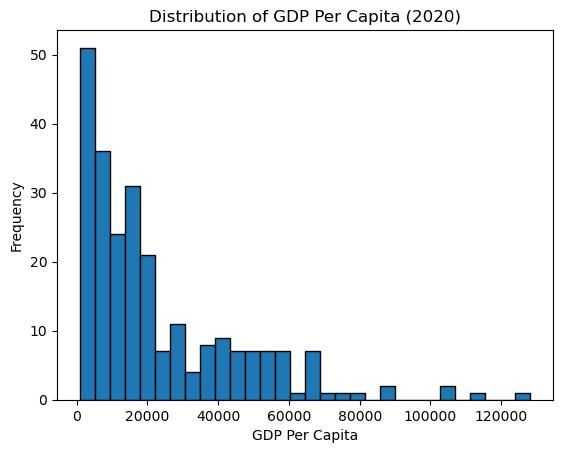

In [19]:
plt.hist(gdp_2020['GDP_Per_Capita'], bins=30, edgecolor='black')
plt.title('Distribution of GDP Per Capita (2020)')
plt.xlabel('GDP Per Capita')
plt.ylabel('Frequency')

In [20]:
#plotting histogram for the distribution of GDP per capita in the year 2020

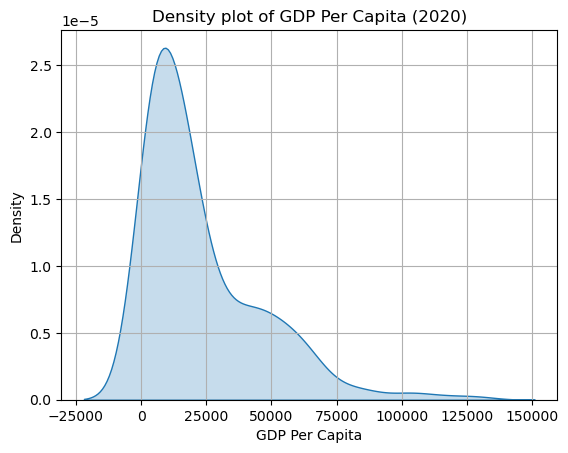

In [21]:
sns.kdeplot(gdp_2020['GDP_Per_Capita'], fill=True)
plt.title('Density plot of GDP Per Capita (2020)')
plt.xlabel('GDP Per Capita')
plt.ylabel('Density')
plt.grid(True)

Text(0, 0.5, 'GDP Per Capita')

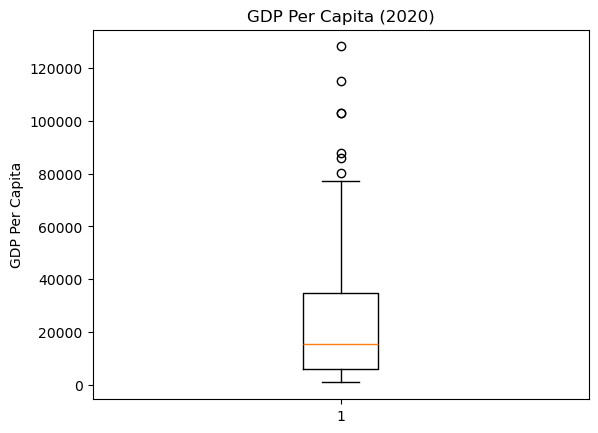

In [22]:
#Box plot of UN GDP per capita for the year 2020
plt.boxplot(gdp_2020['GDP_Per_Capita'])
plt.title('GDP Per Capita (2020)')
plt.ylabel('GDP Per Capita')

In [23]:
#Violin plot of UN GDP per capita for the year 2020

Text(0, 0.5, 'GDP Per Capita')

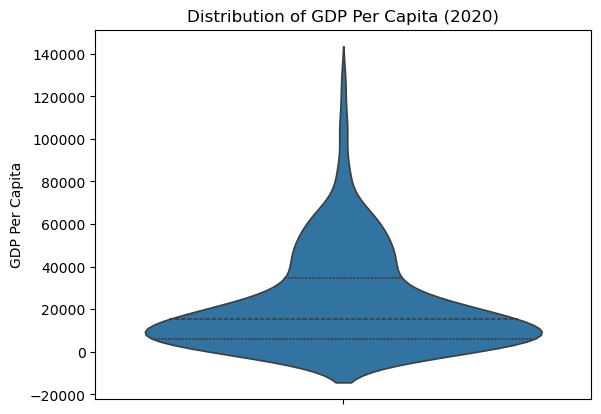

In [24]:
sns.violinplot(gdp_2020['GDP_Per_Capita'], inner='quartile')
plt.title('Distribution of GDP Per Capita (2020)')
plt.ylabel('GDP Per Capita')

__#Q9  What was the median GDP per capita value in 2020?__

In [25]:
#Calculate median 
gdp_df_2020 = gdp_df[gdp_df['Year'] == 2020]
gdp_df_2020['GDP_Per_Capita'].median()

15309.23598817024

__#Q10. For this question, you're going to create some visualizations to compare GDP per capita values for the years 1990, 2000, 2010, and 2020. 
#Start by subsetting your data to just these 4 years into a new DataFrame named gdp_decades. Using this, create the following 4 plots:
	#* A boxplot
	#* A barplot (check out the Barplot with Seaborn section: https://www.python-graph-gallery.com/barplot/#Seaborn)
	#* A scatterplot
	#* A scatterplot with a trend line overlaid (see this regplot example: https://www.python-graph-gallery.com/42-custom-linear-regression-fit-seaborn)  
#Comment on what you observe has happened to GDP values over time and the relative strengths and weaknesses of each type of plot.__

Text(0, 0.5, 'GDP Per Capita')

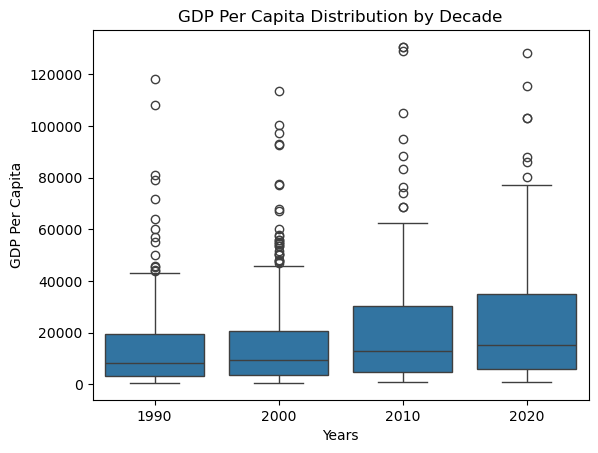

In [26]:
#Plot boxplot
years =[1990, 2000, 2010, 2020]
gdp_decades = gdp_df[gdp_df['Year'].isin(years)]
sns.boxplot(x= gdp_decades['Year'], y= gdp_decades['GDP_Per_Capita'])
plt.title('GDP Per Capita Distribution by Decade')
plt.xlabel('Years')
plt.ylabel('GDP Per Capita')

Text(0, 0.5, 'GDP Per Capita')

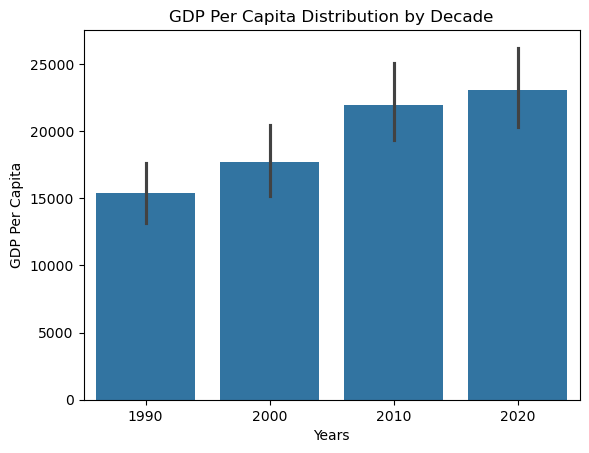

In [27]:
#Plot barplot
sns.barplot(x= gdp_decades['Year'], y= gdp_decades['GDP_Per_Capita'])
plt.title('GDP Per Capita Distribution by Decade')
plt.xlabel('Years')
plt.ylabel('GDP Per Capita')

Text(0, 0.5, 'GDP Per Capita')

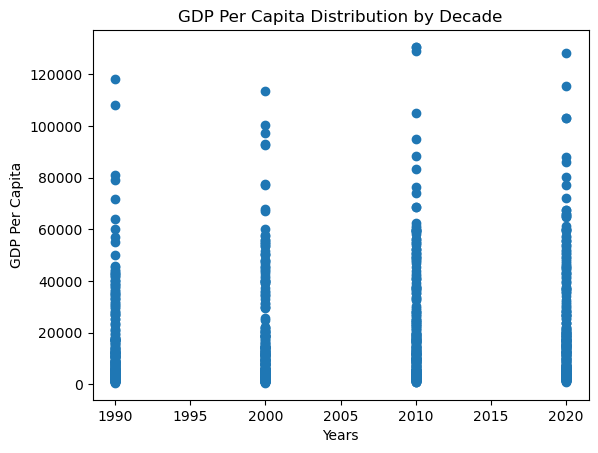

In [28]:
#Plot scatterplot
plt.scatter(x= gdp_decades['Year'], y= gdp_decades['GDP_Per_Capita'])
plt.title('GDP Per Capita Distribution by Decade')
plt.xlabel('Years')
plt.ylabel('GDP Per Capita')

Text(0, 0.5, 'GDP Per Capita')

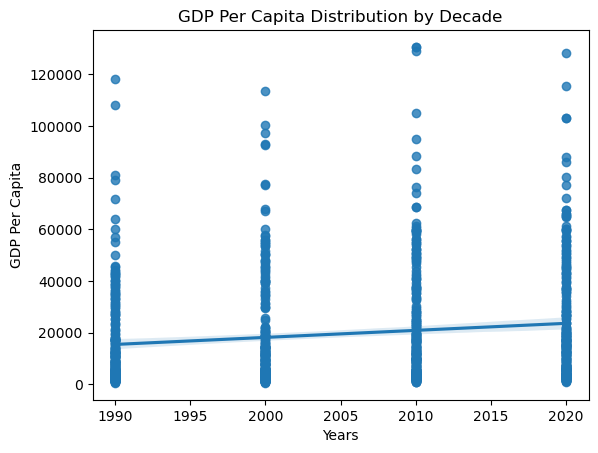

In [29]:
#Plot scatter plot with a trend line
sns.regplot(x= gdp_decades['Year'], y= gdp_decades['GDP_Per_Capita'])
plt.title('GDP Per Capita Distribution by Decade')
plt.xlabel('Years')
plt.ylabel('GDP Per Capita')

__#Q11. Which country was the first to have a GDP per capita greater than $100,000?__

In [30]:
#Sort values by year, then determine the first country to have a GDP per capita greater than $100,000
gdp_over_100k =gdp_df.sort_values(by='Year')[gdp_df.sort_values(by='Year')['GDP_Per_Capita'] > 100000]
gdp_over_100k.iloc[1]

Country           United Arab Emirates
Year                              1990
GDP_Per_Capita           108057.042464
Name: 7827, dtype: object

__#Q12. Which country had the highest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset.__

In [31]:
#Determining the country that had the highest GDP per capita in 2020
gdp_df.set_index('Country')
gdp_2020 = gdp_df[gdp_df['Year'] == 2020]
gdp_2020.loc[gdp_2020['GDP_Per_Capita'].idxmax()]

Country              Luxembourg
Year                       2020
GDP_Per_Capita    128256.560341
Name: 4426, dtype: object

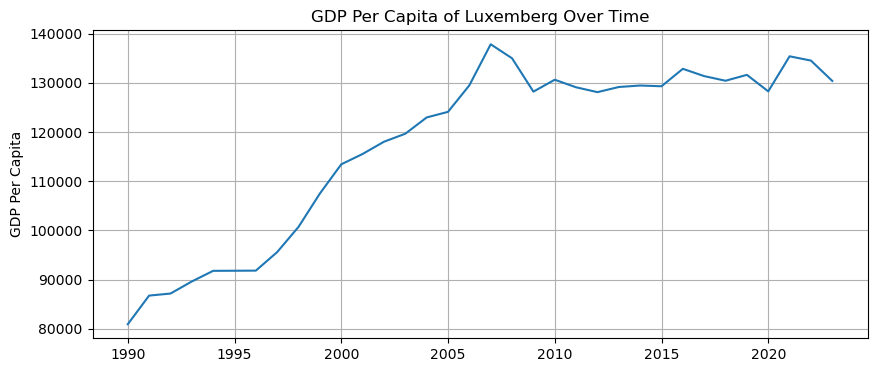

In [32]:
#plot a chart for the country with the highest GDP per capita income in 2020
gdp_luxembourg = gdp_df[gdp_df['Country'] == 'Luxembourg']
plt.figure(figsize=(10, 4))
plt.plot(gdp_luxembourg['Year'], gdp_luxembourg['GDP_Per_Capita'])
plt.title('GDP Per Capita of Luxemberg Over Time')
plt.ylabel('GDP Per Capita')
plt.grid(True)

__#Q13. Which country had the lowest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset. **Bonus question:** Is it true in general that coutries had a higher GDP per capita in 2020 than in 1990? Which countries had lower GDP per capita in 2020 than in 1990?__

In [33]:
#Determe the country that had the lowesest GDP per capita in 2020
gdp_df.set_index('Country')
gdp_2020 = gdp_df[gdp_df['Year'] == 2020]
gdp_2020.loc[gdp_2020['GDP_Per_Capita'].idxmin()]

Country              Burundi
Year                    2020
GDP_Per_Capita    833.920257
Name: 1046, dtype: object

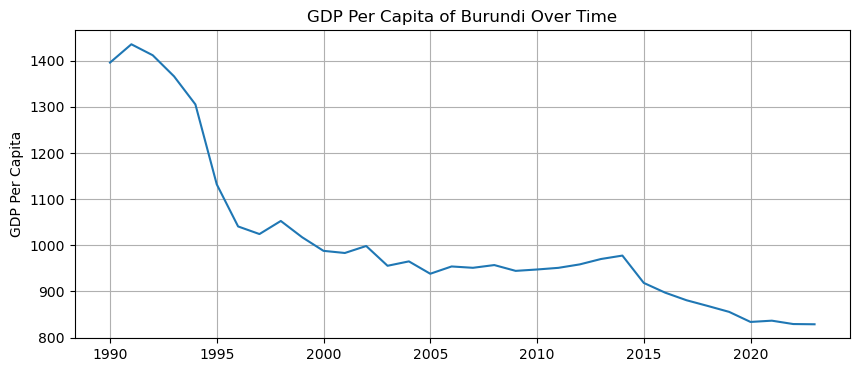

In [34]:
#plot a chart for the country with the lowesest GDP per capita income in 2020
gdp_burundi = gdp_df[gdp_df['Country'] == 'Burundi']
plt.figure(figsize=(10, 4))
plt.plot(gdp_burundi['Year'], gdp_burundi['GDP_Per_Capita'])
plt.title('GDP Per Capita of Burundi Over Time')
plt.ylabel('GDP Per Capita')
plt.grid(True)

__Q14. Read in the internet use dataset into a DataFrame named internet_df. You will likely get errors when doing this. Check the arguments for the read_csv function to find ones that can help correct the errors (https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) Once you are able to read it in, take per a look at the top and bottom few rows to make sure that it has been read in correctly. Also, check the datatypes of the columns.__

In [35]:
#Read in the internet use dataset into a DataFrame named internet_df
internet_df=pd.read_csv('../data/internet_use.csv', nrows=6083)

In [36]:
internet_df.dtypes

Country or Area     object
Year                 int64
Value              float64
Value Footnotes     object
dtype: object

__Q15. Drop the Value Footnotes column and rename the remaining three to 'Country', 'Year', and 'Internet_Users_Pct'.__

In [37]:
internet_df=internet_df.drop('Value Footnotes', axis=1)

In [38]:
#rename the remaining three to 'Country', 'Year', and 'Internet_Users_Pct'.
internet_df=internet_df.rename(columns={'Country or Area':'Country', 'Value':'Internet_Users_Pct'})

__Q16. Look at the number of observations in this dataset per year. What do you notice?__

In [39]:
#number of observations in this dataset per year.
internet_df.groupby('Year')['Country'].count()

Year
1990    226
1991     39
1992     50
1993     66
1994     92
1995    141
1996    177
1997    188
1998    195
1999    207
2000    210
2001    212
2002    214
2003    208
2004    210
2005    212
2006    212
2007    217
2008    214
2009    214
2010    209
2011    214
2012    209
2013    203
2014    204
2015    203
2016    206
2017    205
2018    174
2019    185
2020    186
2021    186
2022    184
2023     11
Name: Country, dtype: int64

__Q17. What is the first year to have a non-zero internet users percentage value?__

In [40]:
#Determine the first year to have a non-zero internet users percentage value
nonzero_intrenet_users = internet_df[internet_df['Internet_Users_Pct']>0]
nonzero_intrenet_users['Year'].min()

1990

__Q18. How does the distribution of internet users percent differ for 2000 and 2014?__

Text(0.5, 1.0, 'Distribution of Internet Users in 2000')

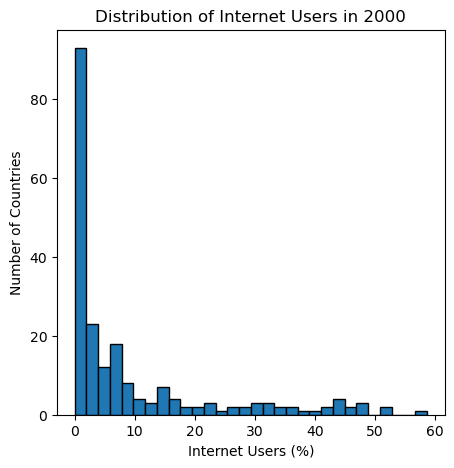

In [49]:
internet_2000 = internet_df[internet_df['Year']==2000]
plt.figure(figsize=(5,5))
plt.hist(internet_2000['Internet_Users_Pct'], bins=30, edgecolor='black')
plt.xlabel('Internet Users (%)')
plt.ylabel('Number of Countries')
plt.title('Distribution of Internet Users in 2000')

Text(0.5, 1.0, 'Distribution of Internet Users in 2014')

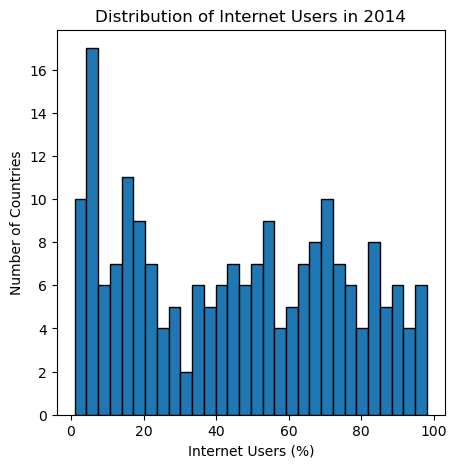

In [50]:
#2014
internet_2014 = internet_df[internet_df['Year']==2014]
plt.figure(figsize=(5,5))
plt.hist(internet_2014['Internet_Users_Pct'], bins=30, edgecolor='black')
plt.xlabel('Internet Users (%)')
plt.ylabel('Number of Countries')
plt.title('Distribution of Internet Users in 2014')

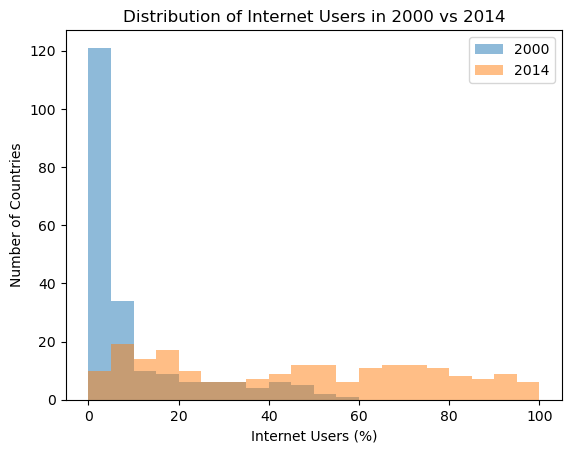

In [51]:
#Jeniffer's aproach
internet_2000 = internet_df[internet_df['Year'] == 2000]['Internet_Users_Pct']
internet_2014 = internet_df[internet_df['Year'] == 2014]['Internet_Users_Pct']

plt.hist(internet_2000, range=(0, 100), bins=20, alpha=0.5, label='2000')
plt.hist(internet_2014, range=(0, 100), bins=20, alpha=0.5, label='2014')

plt.xlabel('Internet Users (%)')
plt.ylabel('Number of Countries')
plt.title('Distribution of Internet Users in 2000 vs 2014')
plt.legend()

In [46]:
#Dibran's approach
internet_df[internet_df['Year']==2000]

,Country,Year,Internet_Users_Pct
42,Albania,2000,0.114097
71,Algeria,2000,0.491706
100,Andorra,2000,10.538800
128,Angola,2000,0.105046
150,Anguilla,2000,22.405400
...,...,...,...
5974,Virgin Islands (US),2000,13.815100
5994,Wallis and Futuna,2000,4.768070
6017,Yemen,2000,0.082500
6045,Zambia,2000,0.191072


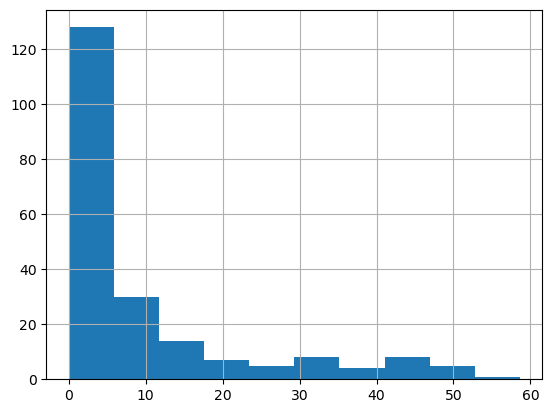

In [47]:
internet_df[internet_df['Year']==2000]['Internet_Users_Pct'].hist();

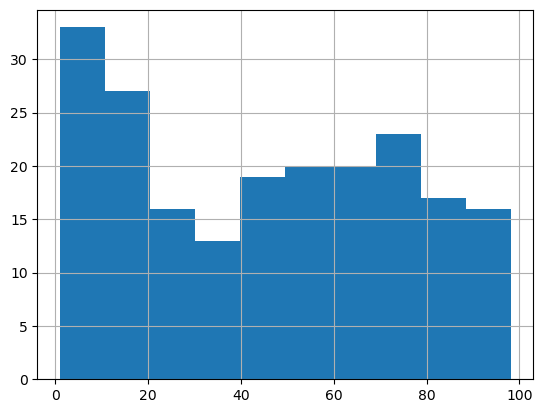

In [48]:
internet_df[internet_df['Year']==2014]['Internet_Users_Pct'].hist();

__Q19. For how many countries was the percentage of internet users below 5% in 2014?__

In [58]:
#Number of countries percentage of internet users below 5% in 2014
internet_users_2014[internet_df[internet_df['Year']==2014]
internet_users_2014[internet_users_2014['Internet_Users_Pct']<5].count()

Country               10
Year                  10
Internet_Users_Pct    10
dtype: int64

In [61]:
#Dibran's approach
internet_df[(internet_df['Year']==2014) & (internet_df['Internet_Users_Pct']<5)]#.count()

,Country,Year,Internet_Users_Pct
873,Burundi,2014,1.04239
1033,Central African Republic,2014,2.70000
1061,Chad,2014,2.90000
1517,Democratic Republic of the Congo,2014,3.00000
1782,Eritrea,2014,0.99000
2451,Guinea-Bissau,2014,3.32000
3364,Madagascar,2014,3.70000
4073,Niger,2014,1.24868
5055,Somalia,2014,1.63000
5116,South Sudan,2014,2.60000


__Q20. Merge the two DataFrames to one. Do this in a way that keeps **all rows** from each of the two DataFrames. Call the new DataFrame `gdp_and_internet_use`. Look at the first and last few rows to confirm that it merged correctly.__

In [63]:
#Dibran's approach
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8219 entries, 0 to 8218
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         8219 non-null   object 
 1   Year            8219 non-null   int64  
 2   GDP_Per_Capita  8219 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 192.8+ KB


In [64]:
internet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6083 entries, 0 to 6082
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             6083 non-null   object 
 1   Year                6083 non-null   int64  
 2   Internet_Users_Pct  6083 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 142.7+ KB


In [67]:
#Merging the two dataframes -Option 1
gdp_df.merge(internet_df, how='outer',on=['Country', 'Year'])
#gdp_df left side df and internet_df is the right side df

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
0,Afghanistan,1990,NaN,0.000000
1,Afghanistan,2000,1617.826475,NaN
2,Afghanistan,2001,1454.110782,0.004723
3,Afghanistan,2002,1774.308743,0.004561
4,Afghanistan,2003,1815.928200,0.087891
...,...,...,...,...
9494,Zimbabwe,2019,3294.806084,26.588300
9495,Zimbabwe,2020,2987.269823,29.298600
9496,Zimbabwe,2021,3184.785451,32.461600
9497,Zimbabwe,2022,3323.121932,32.561500


In [68]:
#Merging the two dataframes -Option 2
gdp_and_internet_use = pd.merge(
    left = gdp_df,
    right = internet_df,
    how = 'outer')

In [72]:
pd.merge(left = gdp_df, right = internet_df, how = 'outer', on=['Country', 'Year'])

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
0,Afghanistan,1990,NaN,0.000000
1,Afghanistan,2000,1617.826475,NaN
2,Afghanistan,2001,1454.110782,0.004723
3,Afghanistan,2002,1774.308743,0.004561
4,Afghanistan,2003,1815.928200,0.087891
...,...,...,...,...
9494,Zimbabwe,2019,3294.806084,26.588300
9495,Zimbabwe,2020,2987.269823,29.298600
9496,Zimbabwe,2021,3184.785451,32.461600
9497,Zimbabwe,2022,3323.121932,32.561500


__Q21. Find the three countries with the highest internet users percentage in 2014. Use a seaborn FacetGrid (https://seaborn.pydata.org/generated/seaborn.FacetGrid.html) to compare how the GDP per capita has changed over time for these three countries. What do you notice?__

In [77]:
#Dibran's approach
countries = gdp_and_internet_use[gdp_and_internet_use['Year'] == 2014].sort_values('Internet_Users_Pct',
                                                                                   ascending = False).head(4)['Country'].tolist()

In [78]:
gdp_and_internet_use[gdp_and_internet_use['Year'] == 2014].sort_values('Internet_Users_Pct',
                                                                                   ascending = False).head(4)['Country'].tolist()

['Iceland', 'Falkland (Malvinas) Islands', 'Bermuda', 'Norway']

In [79]:
gdp_and_internet_use[gdp_and_internet_use['Year'] == 2014].sort_values('Internet_Users_Pct',
                                                                                   ascending = False).head(4)['Country']

3944                        Iceland
2867    Falkland (Malvinas) Islands
824                         Bermuda
6467                         Norway
Name: Country, dtype: object

In [81]:
top_3_countries = gdp_and_internet_use[gdp_and_internet_use['Country'].isin(countries)]

In [85]:
top_3_countries['Country'].value_counts()

Country
Bermuda                        34
Iceland                        34
Norway                         34
Falkland (Malvinas) Islands    23
Name: count, dtype: int64

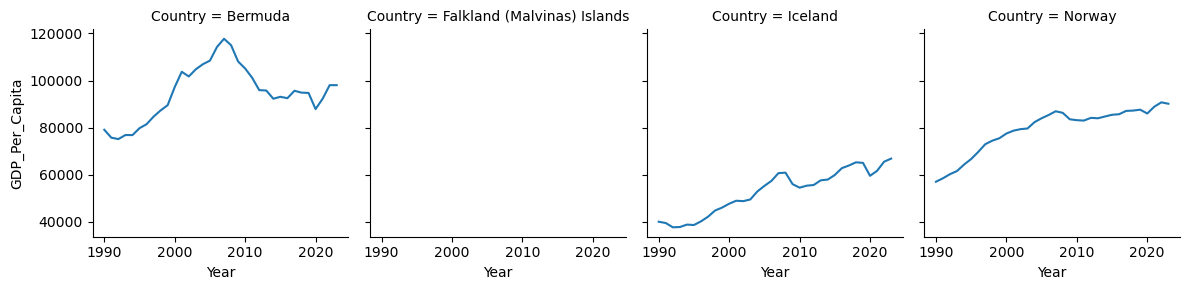

In [87]:
sns.FacetGrid(data = top_3_countries, 
              col = 'Country').map(sns.lineplot, 'Year', 'GDP_Per_Capita')

__Q22. Subset `gdp_and_internet_use` to just the year 2014. Save this as a new dataframe named `gdp_and_internet_use_2014`.
Q23. Create a plot which compares Internet Users Percentage and GDP per Capita for the year 2014. What do you notice from this plot? If you see any unusual points, investigate them.__

__Q23. Create a plot which compares Internet Users Percentage and GDP per Capita for the year 2014. What do you notice from this plot? If you see any unusual points, investigate them.__

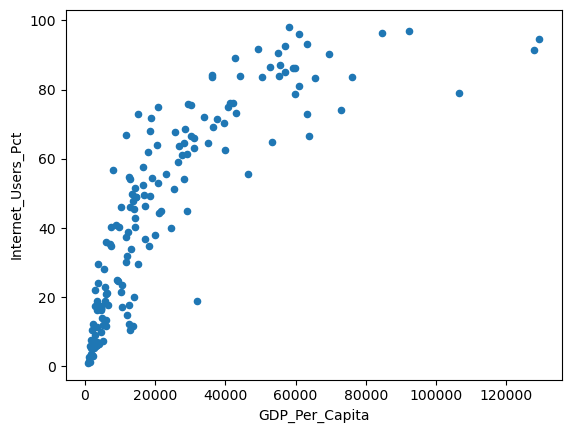

In [92]:
#Dibran's approach: answering both Q22 and Q23 in one solution
year = 2014
gdp_and_internet_use[gdp_and_internet_use['Year'] == year].plot(kind = 'scatter', 
                                                                x = 'GDP_Per_Capita',
                                                                y = 'Internet_Users_Pct');

__Q24. **Stretch Question:** Use the `qcut` function from pandas (https://pandas.pydata.org/docs/reference/api/pandas.qcut.html) to divide countries in `gdp_per_capita_2014` into three groups based on their GDP per capita values. Label these groups as "Low", "Medium", and "High". Put these labels in a new column, named "GDP_group".__

In [95]:
#Dibran's approach
gdp_and_internet_use_2014=gdp_and_internet_use[gdp_and_internet_use['Year'] == 2014]
pd.qcut(gdp_and_internet_use_2014['GDP_Per_Capita'], q = 3)

15        (977.765, 8751.883]
49        (977.765, 8751.883]
83        (977.765, 8751.883]
117     (8751.883, 24573.489]
151     (8751.883, 24573.489]
                ...          
9361      (977.765, 8751.883]
9395    (8751.883, 24573.489]
9424                      NaN
9455      (977.765, 8751.883]
9489      (977.765, 8751.883]
Name: GDP_Per_Capita, Length: 285, dtype: category
Categories (3, interval[float64, right]): [(977.765, 8751.883] < (8751.883, 24573.489] < (24573.489, 162582.374]]

In [97]:
gdp_and_internet_use_2014['GDP_group'] = pd.qcut(gdp_and_internet_use_2014['GDP_Per_Capita'], q = 3,
                                                 labels = ['Low','Medium','High']);

C:\Users\Yille\AppData\Local\Temp\ipykernel_9728\3107067088.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdp_and_internet_use_2014['GDP_group'] = pd.qcut(gdp_and_internet_use_2014['GDP_Per_Capita'], q = 3,


In [98]:
gdp_and_internet_use_2014

,Country,Year,GDP_Per_Capita,Internet_Users_Pct,GDP_group
15,Afghanistan,2014,3017.942544,7.0000,Low
49,Africa Eastern and Southern,2014,4052.851526,NaN,Low
83,Africa Western and Central,2014,4816.917355,NaN,Low
117,Albania,2014,12788.747231,54.3000,Medium
151,Algeria,2014,15073.762940,29.5000,Medium
...,...,...,...,...,...
9361,West Bank and Gaza,2014,5990.426615,NaN,Low
9395,World,2014,17307.606891,NaN,Medium
9424,Yemen,2014,NaN,22.5500,NaN
9455,Zambia,2014,3585.577485,6.5000,Low


__Q25. **Stretch Question:** How does the median internet users percentage compare for the three gdp groups?__

In [99]:
#Dibran's approach
gdp_and_internet_use_2014.groupby('GDP_group')['Internet_Users_Pct'].median()

C:\Users\Yille\AppData\Local\Temp\ipykernel_9728\161003793.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gdp_and_internet_use_2014.groupby('GDP_group')['Internet_Users_Pct'].median()


GDP_group
Low       11.6000
Medium    44.5945
High      75.9800
Name: Internet_Users_Pct, dtype: float64